In [1]:
from jazzElements.note import Note
from jazzElements.chord import Chord
from jazzElements.scale import Scale
from jazzElements.progression import Progression

from matplotlib.pyplot import *
from matplotlib import gridspec
import pandas as pd

The primary goal of this package is to help in the analysis of a chord progression and facilitate learning of jazz standards
For example, we can enter a progression as a string, ask to analyse then plot the results
each cell shows the chord, its degree in the corresponding scale, and optionally the coresponding notes

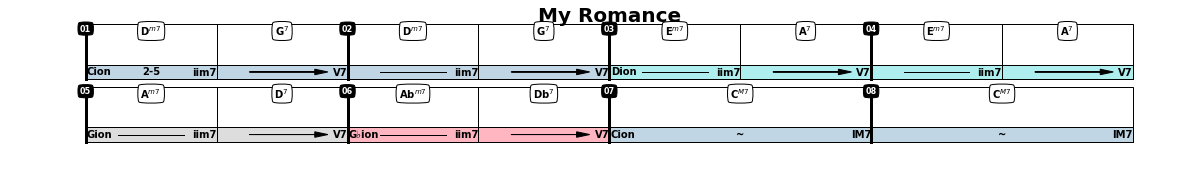

In [2]:
prg = Progression('|Dm7,G7|Dm7,G7|Em7,A7|Em7,A7|Am7,D7|Abm7,Db7|CM7|CM7|',name='My Romance')
prg.analyze() 
prg.plot()

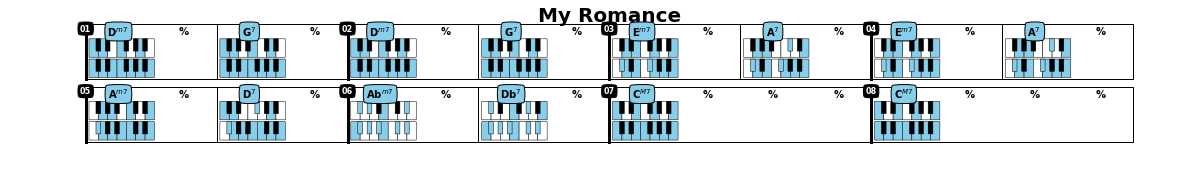

In [3]:
prg.plot('kbd')

# Notes
Notes can be defined as Note('Cb'), Note('D#######') with unicode characters b,♭,#,♯

We can add an additional alteration Note('D',+4)

In [4]:
print(Note('Db'))
print(Note('Db')+3)
print('Nb half-steps between F and C: '+str(Note('F')-Note('C')))

D♭
E
Nb half-steps between F and C: 5


# Chords
Chords can be defined as Chord('Cmb5') or Chord('C', 'G', 'Eb'])

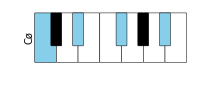

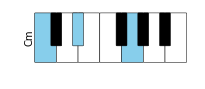

In [5]:
Chord('Cm7b5').plot()
Chord(['C', 'G', 'Eb']).plot()

### Notes, guide tones and avoid notes:
- Guide Tones are the 3rd and 7th of a chord, and determine their quality, so we want to focus on them.
- Avoid Notes are located one step above a given chord's notes, so we want to pass on them for tension but not stay too long around.


In [6]:
print('Notes in Cm7b5:')
print(str(Chord('Cm7b5'))+'\n') # asStr is used to get strings instead of Note instances

print('Guide Tones in Cm7b5:')
print(str(Chord('Cm7b5').guideTones(asStr=True))+'\n')

Notes in Cm7b5:
Cø 1-♭3-♭5-♭7 | C E♭ G♭ B♭

Guide Tones in Cm7b5:
None



### Intervals

In [7]:
print('Intervals in Eb7 (semitones to root): '+str(Chord('Eb7').intArr))
print('As strings: '+'-'.join(Chord('Eb7').intStr))

Intervals in Eb7 (semitones to root): [0, 4, 7, 10]
As strings: 1-3-5-♭7


### Scales on which a given chord can be found (with scale degree) # DEPRECATED

In [8]:
print('F7 can be found in '+'|'.join([' {}:({}) '.format(ch[0], ch[1].replace(' ','')) for ch in Chord('F7').listScales()]))

AttributeError: 'Chord' object has no attribute 'listScales'

# Scales

In [ ]:
print('Chords in Eb Ionian')
print(' | '.join(Scale('Eb').chords(asStr=True)))

print('\nDoes Eb Ionian have Cm7? (returns the scale degree)')
print(Scale('Eb').hasChord(Chord('Cm7')))

print('\nPlot C Dorian:')
Scale('C dor').plot()

### Relative minor of a scale

In [ ]:
print('D Ionian relative minor:')
Scale('D').relativeMinor()

# Modes

### Print all chords from C modes

In [ ]:
import pandas as pd
key = 'C'
lst = {}
for mode in Scale.modesLst:
    if mode is not 'Chr':
            C = Scale(key, mode).chords()
            lst[key + ' ' + mode] = [str(c.root) + c.type for c in C]
print(pd.DataFrame(lst,index=range(1,len(lst)+1)).T)

# Other Examples:

# Plot all chords in a given key

In [ ]:
s = Scale('C minor')
s.plotChords()

# Plot Xm7 in all keys

In [ ]:
fig = figure(figsize=(12, 5))
grid = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
for i, n in enumerate(Note.chrSharp):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(str(n) + 'm7').notes, pos=[0, 0, 100, 60], name=str(n) + 'm7',ax=ax)
    axis('off')
suptitle('Xm7 in all keys');

# Plot every implemented chord type in from a given root

In [ ]:
root = 'C'
fig = figure(figsize=(15, 5))

nCols = 10
nRows = int(np.ceil(len(Chord.chrLst) / nCols))


grid = gridspec.GridSpec(nRows, nCols, wspace=0.4, hspace=0.4)
for i, n in enumerate(Chord.chrLst):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(root + n).notes, pos=[0, 0, 100, 60], name=root + str(n),ax=ax)
    axis('off')
suptitle('Implemented chord types in ' + root);